<u>**Notebook to log and analyze GPS data**</u>

**I. Capture raw NEMA sentecese from serial port** <br>

1. Read NEMA sentences
2. Write the sentences to a .txt file

In [12]:
import os
import serial
import time
from datetime import datetime, timedelta
# Replace '/dev/ttyUSB0' with your serial port if different
serial_port = '/dev/ttyUSB0'
baud_rate = 115200  # In baud rate, adjust as necessary
logging_duration = 15  # Logging duration in minutes
working_directory = '/home/tractor/ros1_lawn_tractor_ws/project_notes/jupyter_notebooks'
timestamp = datetime.now().strftime("%Y%m%d%H%M")
filename = f"gps_data_logger_{timestamp}.txt"
full_path = os.path.join(working_directory, filename)      # Combine the working directory with the filename

def read_gps():
    end_time = datetime.now() + timedelta(minutes=logging_duration)   # Calculate the end time for logging
    print('data being written to file:', full_path)
    print('logging will last until', end_time)
    try:
        with serial.Serial(serial_port, baud_rate, timeout=1) as ser, open(filename, 'w') as file:
            while datetime.now() < end_time:
                line = ser.readline().decode('ascii', errors='replace').strip()
                if line:
                    file.write(line + '\n')
                time.sleep(0.05)  # Adjust this if you need
    except serial.SerialException as e:
        print(f"Error: {e}")

if __name__ == '__main__':
    read_gps()
    print('finished')

data being written to file: /home/tractor/ros1_lawn_tractor_ws/project_notes/jupyter_notebooks/gps_data_logger_202312301505.txt
logging will last until 2023-12-30 15:20:48.905352
finished


Plot the fix quality data

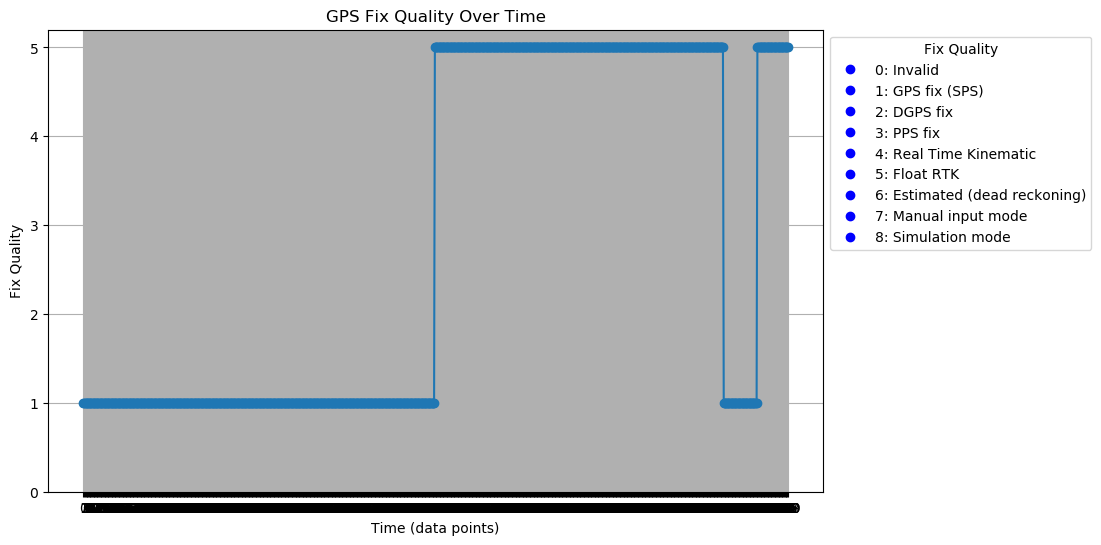

In [13]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Replace this with the path to your file
file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/jupyter_notebooks/gps_data_logger_202312301505.txt'

def parse_gpgga(sentence):
    parts = sentence.split(',')
    if parts[0] == '$GPGGA' and len(parts) > 6:
        return int(parts[6])  # Fix quality
    return None

def read_and_plot(file_path):
    fix_qualities = []

    with open(file_path, 'r') as file:
        for line in file:
            fix_quality = parse_gpgga(line.strip())
            if fix_quality is not None:
                fix_qualities.append(fix_quality)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(fix_qualities, marker='o')
    plt.title('GPS Fix Quality Over Time')
    plt.xlabel('Time (data points)')
    plt.ylabel('Fix Quality')
    plt.xticks(range(len(fix_qualities)))
    plt.yticks(range(0, max(fix_qualities)+1))

    # Create a custom legend
    legend_elements = [
        mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='0: Invalid'),
        mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='1: GPS fix (SPS)'),
        mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='2: DGPS fix'),
        mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='3: PPS fix'),
        mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='4: Real Time Kinematic'),
        mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='5: Float RTK'),
        mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='6: Estimated (dead reckoning)'),
        mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='7: Manual input mode'),
        mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='8: Simulation mode')
    ]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), title="Fix Quality")

    plt.grid(True)
    plt.show()

read_and_plot(file_path)


In [1]:
import React, { useState, useEffect } from 'react';
import { BarChart, Bar, XAxis, YAxis, Tooltip, ResponsiveContainer, LabelList } from 'recharts';

const ProfitHistogram = () => {
  const [histogramData, setHistogramData] = useState([]);

  useEffect(() => {
    const profits = [1387,2148,2201,963,820,2230,3043,2584,2370,1754,2207,996,1298,1266,2341,1059,2666,2637,1817,2252,2813,1410,1741,3292,1674,2991,1426,1040,1428,323,1553,1772,1108,1807,934,2944,1273,1889,352,1648,1932,1295,2056,2063,2147,1529,1166,482,2071,2350,1344,2236,2083,1973,3082,1320,1144,2116,2422,1906,2928,2856,2502,1951,2265,1485,1500,2446,1952,1269,2989,783,2692,1323,1509,1549,369,2070,1717,910,1538,1206,1760,1638,2348,978,2454,1797,1536,2339,1342,1919,1961,2498,1238,1606,1955,1957,2700,443,2357,2127,294,1818,1680,2199,2240,2222,754,2866,2430,1115,1824,1827,2482,2695,2597,1621,732,1704,1124,1907,1915,2701,1325,2742,870,1464,1876,1532,1938,2084,3210,2250,1837,1174,1626,2010,1688,1940,2639,377,2279,2842,1412,1762,2165,1822,2197,842,1220,2626,2434,1809,1915,2231,1897,2646,1963,1401,1501,1640,2415,2119,2389,2445,1461,2059,2175,1752,1821,1546,1766,335,2886,1731,2338,1118,2058,2487];
    
    const min = Math.min(...profits);
    const max = Math.max(...profits);
    const binWidth = (max - min) / 8; // 8 bins

    const bins = Array(8).fill(0);
    const binTotals = Array(8).fill(0);

    profits.forEach(profit => {
      const binIndex = Math.min(Math.floor((profit - min) / binWidth), 7);
      bins[binIndex]++;
      binTotals[binIndex] += profit;
    });

    const data = bins.map((count, index) => ({
      range: `$${(min + index * binWidth).toFixed(0)}-${(min + (index + 1) * binWidth).toFixed(0)}`,
      count: count,
      total: binTotals[index]
    }));

    setHistogramData(data);
  }, []);

  const CustomTooltip = ({ active, payload, label }) => {
    if (active && payload && payload.length) {
      return (
        <div className="bg-white border p-2">
          <p>{`Range: ${label}`}</p>
          <p>{`Count: ${payload[0].value}`}</p>
          <p>{`Total Profit: $${payload[0].payload.total.toLocaleString()}`}</p>
          <p>{`Average Profit: $${(payload[0].payload.total / payload[0].value).toFixed(2)}`}</p>
        </div>
      );
    }
    return null;
  };

  return (
    <div className="w-full h-96">
      <h2 className="text-xl font-bold mb-4">Profit per Car Sales Histogram (8 classes)</h2>
      <ResponsiveContainer width="100%" height="100%">
        <BarChart data={histogramData}>
          <XAxis dataKey="range" angle={-45} textAnchor="end" height={70} />
          <YAxis />
          <Tooltip content={<CustomTooltip />} />
          <Bar dataKey="count" fill="#8884d8">
            <LabelList dataKey="count" position="top" />
          </Bar>
        </BarChart>
      </ResponsiveContainer>
    </div>
  );
};

export default ProfitHistogram;

SyntaxError: invalid syntax (883807158.py, line 1)